# Overall top 5 most popular theme

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
current_dir = os.getcwd()
data_folder = os.path.join(current_dir, "..", "data")
data_files = os.listdir(data_folder)
data_files

['part_categories.csv',
 'inventories.csv',
 'parts.csv',
 'inventory_sets.csv',
 'inventory_parts.csv',
 'colors.csv',
 'sets.csv',
 'downloads_schema.png',
 'themes.csv']

In [3]:
sets_path = os.path.join(data_folder, "sets.csv")
themes_path = os.path.join(data_folder, "themes.csv")

sets = pd.read_csv(sets_path)
themes = pd.read_csv(themes_path)

sets.head()
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [4]:
merged = pd.merge(sets, themes, left_on = 'theme_id', right_on = 'id')
merged.head()

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0
2,2181-1,Infomaniac,1997,84,4,84,Supplemental,67.0
3,300-1,T-Junction Road Plates,1978,84,2,84,Supplemental,67.0
4,301-1,Curved Road Plates,1978,84,2,84,Supplemental,67.0


combine multiple themes with similar names into one:

In [5]:
def merge_themes(df, col_name, themes_list):
    for i in themes_list:
        df[col_name] = df[col_name].apply(lambda x: i if x.startswith(i) else x)
    return df

themes = ["Star Wars", "Disney", "Planet Series", "Spider-Man", "Marvel",
          "Aquaraiders", "Series", "Knights Kingdom", "Matoran", "LEGO",
          "Legoland", "Space Police", "The LEGO", "The Simpsons", "Toa", "Basic"]

merge_themes(merged, "name_y", themes)

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0
2,2181-1,Infomaniac,1997,84,4,84,Supplemental,67.0
3,300-1,T-Junction Road Plates,1978,84,2,84,Supplemental,67.0
4,301-1,Curved Road Plates,1978,84,2,84,Supplemental,67.0
...,...,...,...,...,...,...,...,...
11668,K6762-1,Western Kit,2002,475,3,475,Western,NaN
11669,K7623-1,Indiana Jones Classic Adventures Collection,2008,264,4,264,Indiana Jones,NaN
11670,llca27-1,Legoland Pirate with Parrot (Legoland California),2006,430,70,430,Pirates,425.0
11671,LLCA29-1,Pirate Treasure Chest Bank (LLCA Ambassador Pa...,2006,430,215,430,Pirates,425.0


In [6]:
merged['name_y'].value_counts().head(5)

name_y
Star Wars       634
Supplemental    496
Basic           455
Technic         435
Series          409
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 5 most popular theme')

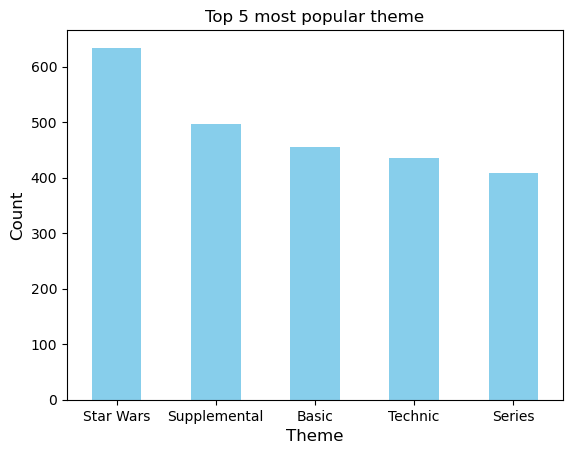

In [24]:
merged['name_y'].value_counts().head(5).plot.bar(color = 'skyblue')
plt.xlabel("Theme", fontsize = 12)
plt.xticks(rotation = 0)
plt.ylabel("Count", fontsize = 12)
plt.title("Top 5 most popular theme")

for each decade
:

In [8]:
def year_to_decade (year):
    if year < 1960:
        return 1950
    elif year < 1970:
        return 1960
    elif year < 1980:
        return 1970
    elif year < 1990:
        return 1980
    elif year < 2000:
        return 1990
    elif year < 2010:
        return 2000
    else:
        return 2010

merged['decade'] = merged['year'].apply(year_to_decade)

In [9]:
merged.head()

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id,decade
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0,1970
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0,1970
2,2181-1,Infomaniac,1997,84,4,84,Supplemental,67.0,1990
3,300-1,T-Junction Road Plates,1978,84,2,84,Supplemental,67.0,1970
4,301-1,Curved Road Plates,1978,84,2,84,Supplemental,67.0,1970


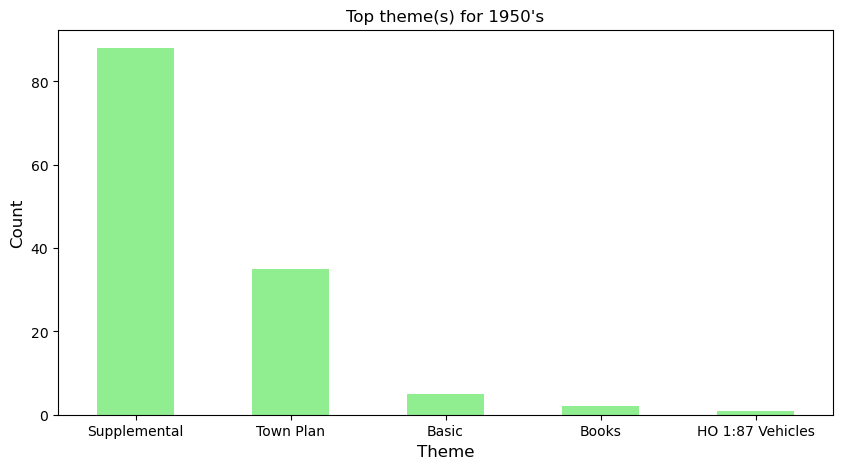

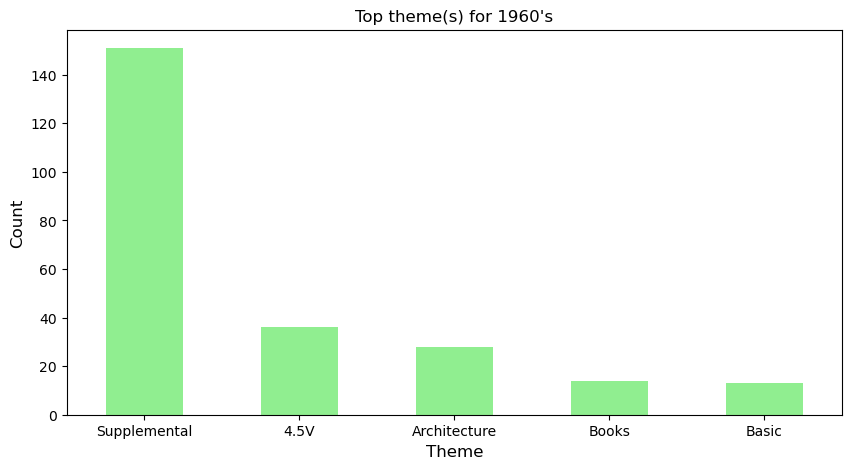

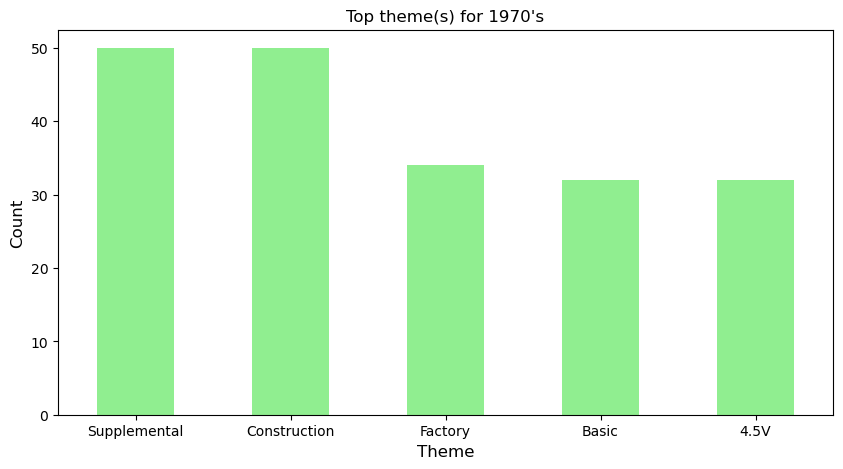

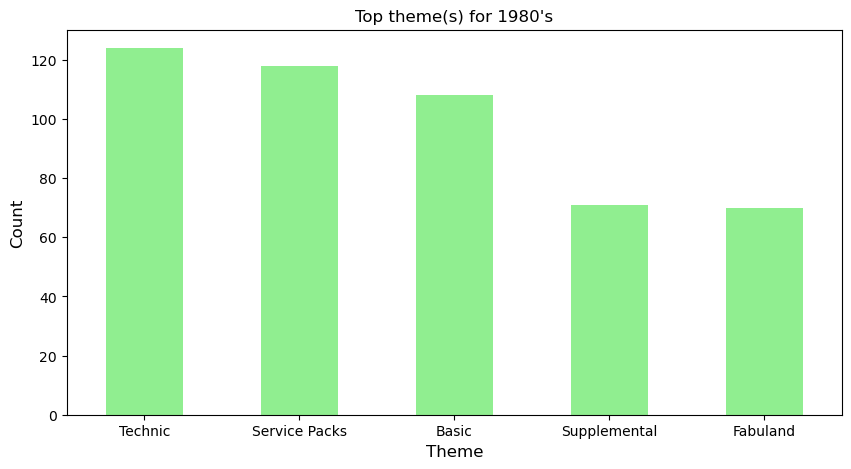

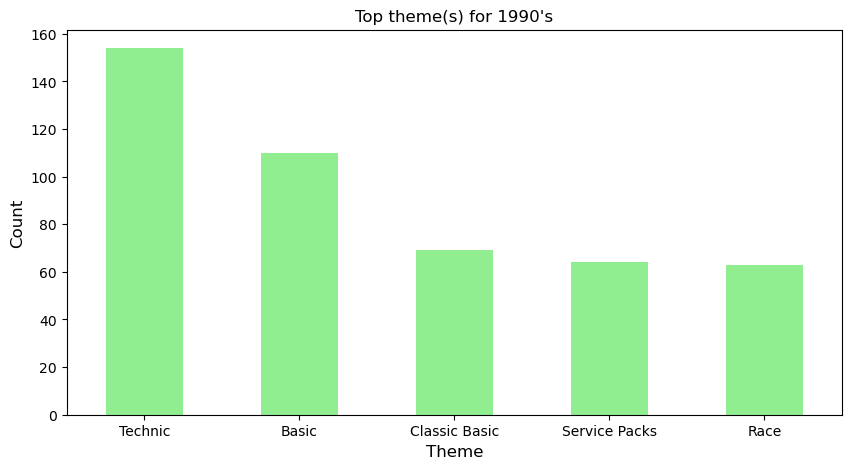

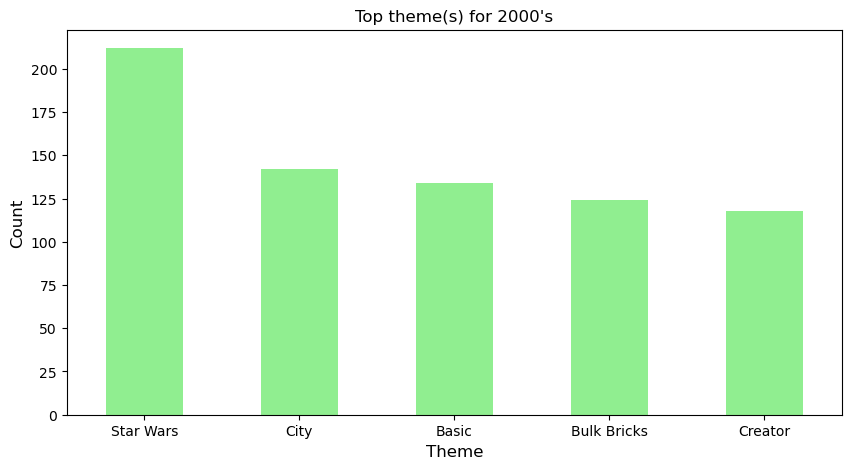

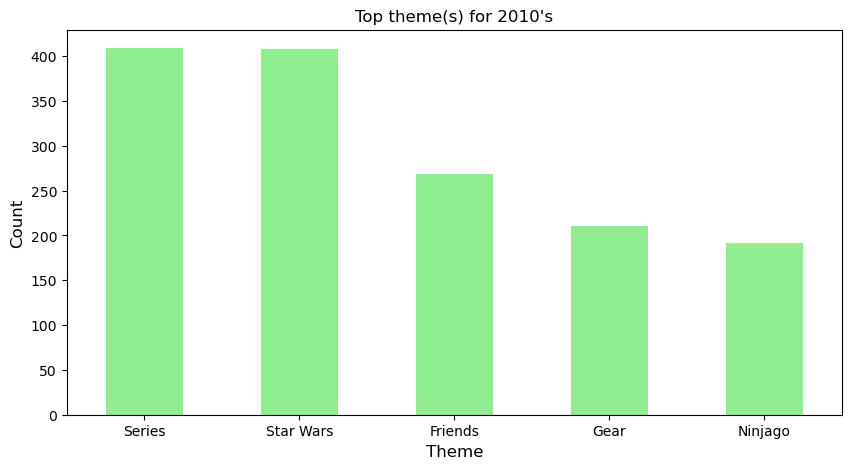

In [28]:
decade_grouped = merged.groupby(by=["decade"])

for decade, decade_data in decade_grouped:
    plt.figure(figsize=(10,5))
    top5_names_per_year = decade_data['name_y'].value_counts().head(5)
    top5_names_per_year.plot.bar(color = 'lightgreen')
    plt.xlabel("Theme", fontsize = 12)
    plt.xticks(rotation = 0)
    plt.ylabel("Count", fontsize = 12)
    plt.title(f"Top theme(s) for {int(decade[0])}'s")

